> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

My data analysis will look at two questions:

How many no shows are there?

Do a high proportion of no shows have medical issues ie diabetes, hypertension, alcoholism or are handicapped?


In [101]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot visualizations inline of the notebook
%matplotlib inline

# load dataset
df = pd.read_csv('noshowappointments.csv')


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [102]:
# Load your data and print out a few lines. 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [103]:
# check amount of samples
df.shape

(110527, 14)

This dataset has 110527 rows and 14 columns of data.

In [104]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here all the colums are listed with how many non null values are represnted and the data type of the column. I  can see that i will later need to ammend the data types of ScheduledDay ans AppointmentDay to DateTime. Patient ID should also be converted to integer.

In [105]:
#summary of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we can see that age has a min age of -1 and handicap has a max of 4. These results are out of the ordinary and should be ignored or addressed.

In [106]:
#Convert PatientId from float to int and check the conversion
df['PatientId'] = df['PatientId'].astype(int)
df.PatientId.head()

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: PatientId, dtype: int64

In [107]:
#Convert ScheduledDay and AppointmentDay to datetime 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [108]:
#check datatype of column
type(df['ScheduledDay'])
(df['ScheduledDay']).head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

In [109]:
#check datatype of column
type(df['AppointmentDay'])
(df['AppointmentDay']).head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

Both ScheduledDay and AppointmentDay have been converted to datetime.

In [110]:
#check the datatypes of the columns and if there are missing entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [111]:
#check for duplicates
sum(df.duplicated())

0

There is no duplicated data in this dataset

In [112]:
# rename to columns 
df.rename(columns={'Scholarship':'Welfare','Hipertension':'Hypertension', 'Handcap':'Handicap','No-show':'No_show'} ,inplace=True )

Some columns had spelling errors fixed

In [113]:
#check all the ammendments have been made
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [114]:
#drop columns
df.drop(df.columns[[3,4,5]], axis = 1, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,Neighbourhood,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,JARDIM DA PENHA,0,1,1,0,0,0,No


I decided to get rid of some columns that were not going to be used or had outliers.

# <a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

#How many no shows have there been?

# How many no shows have there been?



In [115]:
#Total appointments
sum(df['No_show'].value_counts())

110527

There has been a total of 110527 appointments made.

In [82]:
#No show column value count
df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

Of the total 110527 appointments. 88208 appointments were fufilled and 22319 were recorded as no show. Below is a graph illustaring this.

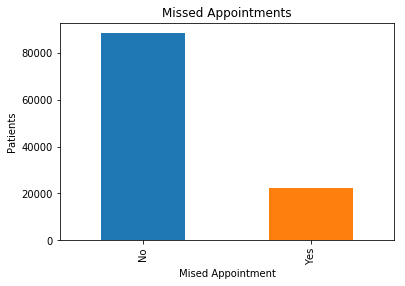

In [83]:
no_show = df['No_show'].value_counts()
no_show.plot(kind='bar', title='Missed Appointments')
plt.xlabel('Missed Appointment')
plt.ylabel('Patients');




A graph illustrating missed appointments

To calculate teh percentage of no shows, we use the total of people who missed their appointment 22319 and divide it by the total amount of appointments 110527. This gives 0.201, this is then multiplied by 100 to give a percentage of 20%

#  Do a high proportion of no shows have medical issues ie diabetes, hypertension, alcoholism or are handicapped?

In [84]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [85]:
# Gender count
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

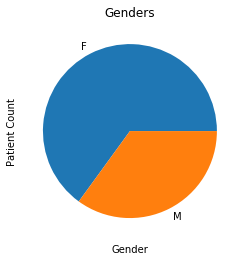

In [86]:
gender = df['Gender'].value_counts()
gender.plot(kind='pie', title='Genders')
plt.xlabel('Gender')
plt.ylabel('Patient Count');

Here you can visually see that F ('Female') make up the majority of the pie chart and M ('Men') are less.

In [87]:
#new_df = df.groupby(['Welfare','Hypertension','Diabetes','Alcoholism'],as_index=False)['No_show'];
#new_df.head();

In [122]:
# split the data frame into those who showed up to their appointmnet and those who did not

missed = df.query('No_show == "Yes"')
show = df.query('No_show == "No"')
missed.head()

,PatientId,AppointmentID,Gender,Neighbourhood,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
6,733688164476661,5630279,F,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7542951368435,5620163,M,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,14794966191172,5633460,F,CONQUISTA,1,0,0,0,0,0,Yes
20,622257462899397,5626083,F,NOVA PALESTINA,0,0,0,0,0,0,Yes


Created a variables of dataframes where the main component was either a missed appointment or turning up to the appointment (show). I will then calculate the percentage of no shows where the person had an ailment (

In [117]:
df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [121]:
missed.groupby(No_show)

NameError: name 'No_show' is not defined

Text(0, 0.5, 'welfare')

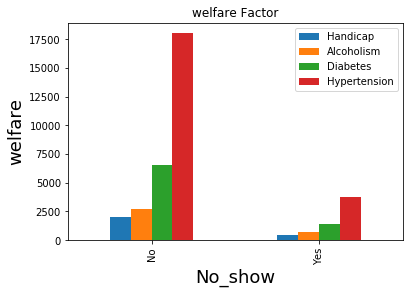

In [126]:
Welfare_factor = df.groupby(['No_show'])['Handicap','Alcoholism','Diabetes','Hypertension'].sum()

Welfare_factor.plot(kind = 'bar', title = 'welfare Factor')

plt.xlabel('No_show', fontsize = 18)

plt.ylabel('welfare', fontsize = 18)

In [90]:
# missed.query()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

#Resources used
Notes
Rerun of udacity videos
https://pandas.pydata.org/pandas-docs/stable/index.html
https://stackoverflow.com/tags/pandas/hot
https://matplotlib.org/gallery/index.html
https://python-graph-gallery.com
https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
https://github.com/facebook/prophet/issues/821